In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from yellowbrick.classifier import ConfusionMatrix, ClassBalance
from yellowbrick.classifier.rocauc import ROCAUC

In [2]:
# import cleaned data
liver_df = pd.read_csv('indian_liver_dataset_clean.csv', index_col=0)
print(liver_df.info())
liver_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 582
Data columns (total 11 columns):
age              583 non-null int64
sex              583 non-null object
total bili       583 non-null float64
direct bili      583 non-null float64
ALP              583 non-null int64
ALT              583 non-null int64
AST              583 non-null int64
total protein    583 non-null float64
albumin          583 non-null float64
a-g ratio        583 non-null float64
liver disease    583 non-null bool
dtypes: bool(1), float64(5), int64(4), object(1)
memory usage: 50.7+ KB
None


,age,sex,total bili,direct bili,ALP,ALT,AST,total protein,albumin,a-g ratio,liver disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,True
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,True
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,True
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,True
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,True
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,True
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,True
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,True
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,False
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,True


In [3]:
# convert variables to numeric form
liver_df.sex = liver_df.sex.map({'Male': 1, 'Female': 0})
liver_df['liver disease'] = liver_df['liver disease'].astype('int')
liver_df.head(10)

,age,sex,total bili,direct bili,ALP,ALT,AST,total protein,albumin,a-g ratio,liver disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
## separate diseased and undiseased subjects
# group_1 = liver_df[liver_df['liver disease'] == 1]
# group_0 = liver_df[liver_df['liver disease'] == 0]

# randomly divide data set into training and test sets
seed = 1204
test_prop = 0.2

# np.random.seed = seed
# mask_1 = np.random.rand(len(group_1)) < (1 - test_prop)
# np.random_seed = seed
# mask_0 = np.random.rand(len(group_0)) < (1 - test_prop)

# group_1_train = group_1[mask_1]
# group_1_test = group_1[~mask_1]

# group_0_train = group_0[mask_0]
# group_0_test = group_0[~mask_0]

## rejoin groups into training and test data sets
# liver_train = pd.concat([group_1_train, group_0_train])
# liver_test = pd.concat([group_1_test, group_0_test])

In [5]:
# create variable and outcome dataframes
# X_train = liver_train.copy()
# y_train = X_train.pop('liver disease')

# X_test = liver_test.copy()
# y_test = X_test.pop('liver disease')

In [6]:
# split into train and test without reference to group
X = liver_df.copy()
y = X.pop('liver disease')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_prop)

In [7]:
# create and run model
model = RandomForestClassifier(n_estimators=1000,
                               max_features='auto',
                               max_depth=None,
                               oob_score=True,
                               n_jobs=-1,
                               random_state=seed)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1204, verbose=0, warm_start=False)

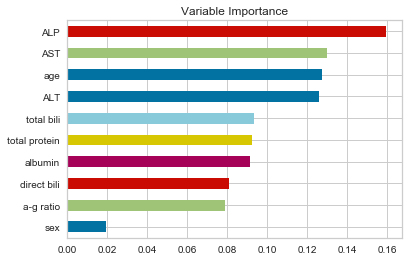

In [8]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(inplace=True)
plt.title('Variable Importance')
importances.plot(kind='barh')

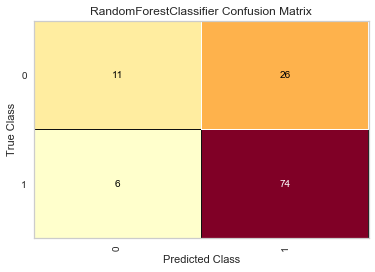

In [9]:
confusion = ConfusionMatrix(model, classes=[0,1])
confusion.score(X_test, y_test)
confusion.poof()

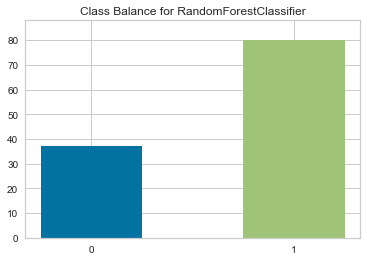

In [10]:
balance = ClassBalance(model, classes=[0,1])
plt.title('Class Balance')
balance.score(X_test, y_test)
balance.poof()

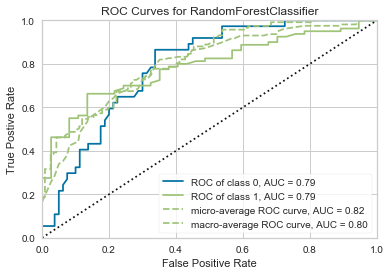

In [11]:
# ROC curve
roc_curve = ROCAUC(model, classes=[0,1])
roc_curve.score(X_test, y_test)
roc_curve.poof()

In [12]:
# # optimize number of trees
# estimators_options = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# for option in estimators_options:
#     model = RandomForestClassifier(n_estimators=option,
#                                max_features='auto',
#                                max_depth=None,
#                                n_jobs=-1,
#                                random_state=seed)
#     auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
#     print('{} trees: '.format(option), auc)
    
# # 500 trees seems to be the maximum valuable number of trees, with little improvement above 300

In [13]:
# # optimize max features
# features_options = ['auto', 'sqrt', 'log2', None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# for option in features_options:
#     model = RandomForestClassifier(n_estimators=500,
#                                max_features=option,
#                                max_depth=None,
#                                n_jobs=-1,
#                                random_state=seed)
#     auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
#     print('{} features: '.format(option), auc)

# # 1 feature seems to be optimal

In [14]:
# # optimize max_depth
# depth_options = [None, 5, 10, 15, 20, 25, 30, 35, 40]

# for option in depth_options:
#     model = RandomForestClassifier(n_estimators=500,
#                                max_features=1,
#                                max_depth=option,
#                                n_jobs=-1,
#                                random_state=seed)
#     auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
#     print('{} depth: '.format(option), auc)
    
# # 5 depth seems optimal

In [15]:
# # try different random seeds

# for seed_num in range(11):
#     model = RandomForestClassifier(n_estimators=500,
#                                max_features=1,
#                                max_depth=5,
#                                n_jobs=-1)
#     auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
#     print('seed {}: '.format(seed_num), auc)
    
# # model is relatively consistent across seeds

In [16]:
# optimized model
model = RandomForestClassifier(n_estimators=500,
                               max_features=1,
                               max_depth=5,
                               n_jobs=-1,
                               random_state=seed)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=1204, verbose=0,
            warm_start=False)

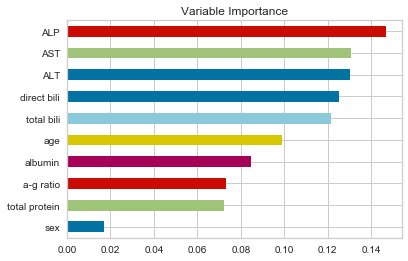

In [17]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(inplace=True)
plt.title('Variable Importance')
importances.plot(kind='barh')

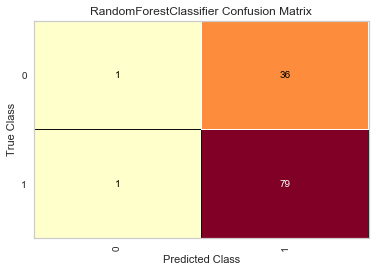

In [18]:
confusion = ConfusionMatrix(model, classes=[0,1])
confusion.score(X_test, y_test)
confusion.poof()

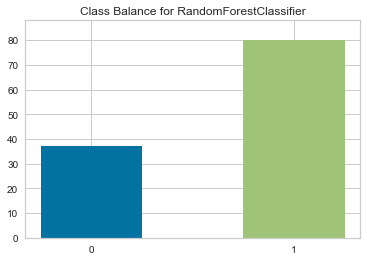

In [19]:
balance = ClassBalance(model, classes=[0,1])
plt.title('Class Balance')
balance.score(X_test, y_test)
balance.poof()

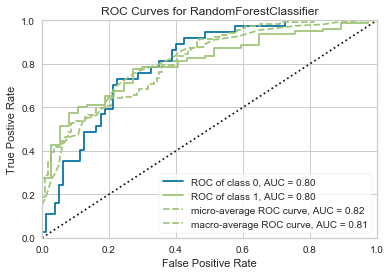

In [20]:
# ROC curve
roc_curve = ROCAUC(model, classes=[0,1])
roc_curve.score(X_test, y_test)
roc_curve.poof()